In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("hateb_log.txt", sep = " ", header = None)
df = df[[2, 7, 9]]
df.columns = ["Velocity", "HRDist", "Mode"]
df["Velocity"] = df["Velocity"].apply(lambda x: x.split(",")[0])
df["HRDist"] = df["HRDist"].apply(lambda x: x.split(",")[0])
df["Mode"] = df["Mode"].apply(lambda x: x.split(",")[0])
df = df.astype({'Velocity':'float','HRDist':'float'})
print(df.dtypes)
df.head()

Velocity    float64
HRDist      float64
Mode         object
dtype: object


,Velocity,HRDist,Mode
0,-0.400000,4.630806,SingleBand
1,-0.400000,4.701178,SingleBand
2,-0.328235,4.704190,SingleBand
3,-0.295885,4.734036,SingleBand
4,-0.322493,4.791691,SingleBand


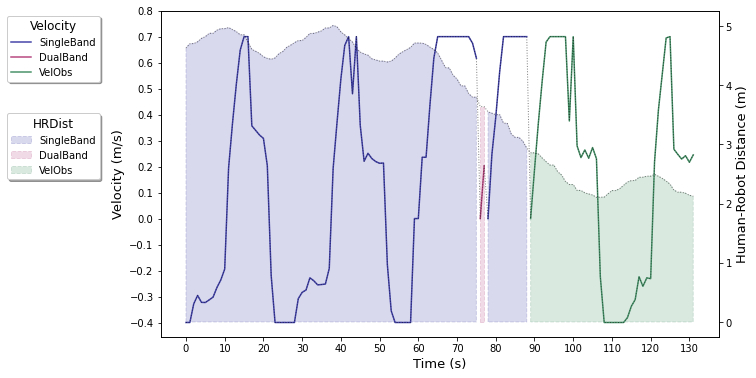

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

df_sb = df.where(df['Mode'] == 'SingleBand')
df_db = df.where(df['Mode'] == 'DualBand')
df_vo = df.where(df['Mode'] == 'VelObs')
df_b = df.where(df['Mode'] == 'Backoff')

ax.plot(df_sb.index, df_sb["Velocity"].values, color = "#4242a8", label = 'SingleBand')
ax.plot(df_db.index, df_db["Velocity"].values, color = "#b64780", label = 'DualBand')
ax.plot(df_vo.index, df_vo["Velocity"].values, color = "#479168", label = 'VelObs')
#ax.plot(df_b.index, df_b["Velocity"].values, color = "#edfe01", label = 'Backoff')
ax.plot(df.index, df["Velocity"].values, color = "black", ls = ":", lw = 1, alpha = 0.5)
ax.set_ylabel("Velocity (m/s)", color = "black", fontsize = 13)
ax.set_yticks(np.arange(-0.4, 0.8, 0.1))
ax.set_xticks(np.arange(0, len(df) + 1, 10))

ax2 = ax.twinx()
ax2.fill_between(df_sb.index, df_sb["HRDist"].values, ls = "--", color = "#4242a8", alpha = 0.2,  label = 'SingleBand')
ax2.fill_between(df_db.index, df_db["HRDist"].values, ls = "--", color = "#b64780", alpha = 0.2, label = 'DualBand')
ax2.fill_between(df_vo.index, df_vo["HRDist"].values, ls = "--", color = "#479168", alpha = 0.2, label = 'VelObs')
#ax2.fill_between(df_b.index, df_b["HRDist"].values, ls = "--", color = "#edfe01", alpha = 0.3, label = 'Backoff')
ax2.plot(df.index, df["HRDist"].values, color = "black", ls = ":", lw = 1, alpha = 0.5)
ax2.set_ylabel("Human-Robot Distance (m)", color = "black", fontsize = 13)

ax.set_xlabel("Time (s)", color = "black", fontsize = 13)
ax.legend(loc = 'best', title = "Velocity", title_fontsize = "large", 
          fontsize = "medium", bbox_to_anchor=(-0.6, 0.5, 0.5, 0.5), shadow = True)
ax2.legend(loc = 'best', title = "HRDist", title_fontsize = "large", 
           fontsize = "medium", bbox_to_anchor=(-0.6, 0.2, 0.5, 0.5), shadow = True)

plt.show()
fig.savefig("example_plot.png", bbox_inches ="tight")